In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#Loading the datasets
train_df=pd.read_csv('/kaggle/input/harsh-comment-classification/train.csv')
test_df=pd.read_csv('/kaggle/input/harsh-comment-classification/test.csv')

test_labels=pd.read_csv('/kaggle/input/harsh-comment-classification/sample.csv')
# train_df=pd.read_csv('train.csv')
# test_df=pd.read_csv('test.csv')
train_df.drop(labels='id', axis=1,inplace=True)

ANALYZING THE DATASET

In [5]:
train_df.shape

(89359, 7)

In [6]:
train_df.head()

,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,""", 6 December 2007 (UTC)\nI am interested, not...",0,0,0,0,0,0
1,I added about three missing parameters to temp...,0,0,0,0,0,0
2,SANDBOX?? \n\nI DID YOUR MADRE DID IN THE SANDBOX,1,0,0,0,0,0
3,"why good sir? Why? \n\nYou, sir, obviously do ...",1,0,1,1,1,0
4,"""\n\n Source \n\nIncase I forget, or someone e...",0,0,0,0,0,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89359 entries, 0 to 89358
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             89359 non-null  object
 1   harsh            89359 non-null  int64 
 2   extremely_harsh  89359 non-null  int64 
 3   vulgar           89359 non-null  int64 
 4   threatening      89359 non-null  int64 
 5   disrespect       89359 non-null  int64 
 6   targeted_hate    89359 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 4.8+ MB


In [8]:
train_df.isnull().sum()

text               0
harsh              0
extremely_harsh    0
vulgar             0
threatening        0
disrespect         0
targeted_hate      0
dtype: int64

In [9]:
train_df.dtypes
#Removing all the duplicate rows
train_df.duplicated().sum()

0

In [10]:
train_df.nunique()

text               89359
harsh                  2
extremely_harsh        2
vulgar                 2
threatening            2
disrespect             2
targeted_hate          2
dtype: int64

In [11]:
#Skew represents the degree of distortion from the normal distribution 
train_df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


harsh               2.747096
extremely_harsh     9.719087
vulgar              3.987572
threatening        18.178097
disrespect          4.171107
targeted_hate      10.413112
dtype: float64

In [12]:
strlen = train_df.text.str.len()
strlen.mean(), strlen.std(), strlen.max()

(395.0494186371826, 591.2209016091286, 5000)

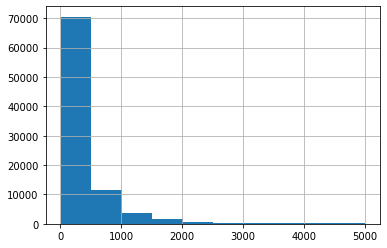

In [13]:
#Observation of the concentration of the sentences on the labels
strlen.hist();

In [14]:
#Labels are mentioned
label_cols = ['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate']
train_df['none'] = 1-train_df[label_cols].max(axis=1)
train_df.describe()

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate,none
count,89359.000000,89359.000000,89359.000000,89359.000000,89359.000000,89359.000000,89359.000000
mean,0.095782,0.010262,0.053067,0.002999,0.049150,0.008975,0.898432
std,0.294294,0.100781,0.224168,0.054683,0.216182,0.094311,0.302081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Graph to represent more about the training dataset
# import matplotlib.pyplot as plt
# import seaborn as sns

# temp_df=train_df.iloc[:,1:-1]

# corr=temp_df.corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(corr,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values, annot=True)

In [16]:
 !pip install contractions

PREPROCESSING THE DATASET

In [17]:
%time
import contractions

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 24.1 µs


In [18]:
#Apply the contractions to convert the modern slang to vintage slang
train_df["text"] = train_df["text"].apply(lambda x: contractions.fix(x))
test_df["text"] = test_df["text"].apply(lambda x: contractions.fix(x))

In [19]:
#Convert all the words to lower case in both the datasets
train_df['text'] = train_df['text'].str.lower()
test_df["text"] = test_df["text"].str.lower()

In [20]:
#Remove the numbers
# train_df['text'] = train_df['text'].str.replace('\d+', '')
# test_df['text'] = test_df['text'].str.replace('\d+', '')

In [21]:
#   def stop_words_remover(self,text):
#         #
#         cleaned_text=[w for w in text if not w in self.stop_words]
        
#         return cleaned_text

In [22]:
#Important to acronymize the words in the datasets
acr_words={'afaik':'as far as i know',
'asap':'As Soon As Possible',
'ATM':'At The Moment',
'FAQ':'Frequently Asked Questions',
'FWIW':'For What It Worth',
'FYI':'For Your Information',
'GG':'Good Game',
'GN':'Good Night',
'IMHO':'In My Honest Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL':'In Real Life',
'LMAO':'Laugh My Ass Off',
'LOL':'Laughing Out Loud',
'M8':'Mate',
'PITA':'Pain In The Ass',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL':'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My ASS Off',
'THX':'Thank You',
'TTFN':'TaTa For Now',
'U':'You',
# U2
# WB=Welcome Back
'WTF':'What The FUCK',
}


In [23]:
comments_list = train_df['text'].tolist()
comments_test = test_df['text'].tolist()

In [24]:
acronyms=dict((k.lower(), v.lower()) for k, v in acr_words.items())
# acronyms

In [25]:
dictionary = [word for word in acr_words.keys()]

In [26]:
#Removing the punctuations and acronymizing the words
import re
temporary = []
for comment in comments_list:
    words = str(comment).split()
    sentence = ""
    for word in words:
        if word in dictionary:
            word = acronyms[word]
        sentence += word + " "
        sentence = re.sub('[^a-zA-Z ]+', "", sentence)
    temporary.append(sentence)
train_df['text'] = temporary 
del temporary

train_df['text']

0          december  utc i am interested not in arguing...
1        i added about three missing parameters to temp...
2             sandbox i did your madre did in the sandbox 
3        why good sir why you sir obviously do not comp...
4         source incase i forget or someone else wants ...
                               ...                        
89354     this is becuase very few of his critics have ...
89355     if you are going to be technical boyd never p...
89356     join us at fb hello pakistanis wikipedians as...
89357    lockhart i updated some of the references on d...
89358    the whole section has bad formatting and needs...
Name: text, Length: 89359, dtype: object

In [27]:
#Removing the punctuations and acronymizing the words
import re
temporary = []
for comment in comments_test:
    words = str(comment).split()
    sentence = ""
    for word in words:
        if word in dictionary:
            word = acronyms[word]
        sentence += word + " "
        sentence = re.sub('[^a-zA-Z ]+', "", sentence)
    temporary.append(sentence)
test_df['text'] = temporary 
del temporary

test_df['text']

0                    in an interview before his execution 
1        he knew what he was doing the below posts are ...
2        zzzzzzz you are a real bore now go bore someon...
3         yet it remains confusion because the  is just...
4        i was referring to them losing interest in van...
                               ...                        
38292    please refrain from removing content from wiki...
38293                                       october  utc  
38294    listing the girls in alphabetical order who ke...
38295    dumb fuck why did you delete the angry nintend...
38296    fine job i would never find the log myself but...
Name: text, Length: 38297, dtype: object

In [28]:
#Remove all the words over 16 characters in it
import re 
si = train_df['text'].shape[0]
for i in range(0,si):
  train_df['text'][i] = re.sub(r'\b\w{16,}\b','',train_df['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
#Remove all the words over 16 characters in it
sz = test_df['text'].shape[0]
for i in range(0,sz):
  test_df['text'][i] = re.sub(r'\b\w{16,}\b','',test_df['text'][i])

In [30]:
#Removing all the website links from the datasets
for i in range(0,si):
  train_df['text'][i] = re.sub(r'http\S+', '', train_df['text'][i])
for i in range(0,sz):
  test_df['text'][i] = re.sub(r'http\S+', '', test_df['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#This function removes all the duplicate words in the datasets
def dups(string):
    val = ""
    i = 0
    while (i < len(string)):
        if (i < len(string) - 2 and
            string[i] * 3 == string[i:i + 3]):
            i += 3
        else:
            val += string[i]
            i += 1
             
    if (len(val) == len(string)):
        return val
    else:
        return dups(val)
 
# Driver code
for i in range(0,si):
  train_df['text'][i] = dups(train_df['text'][i])
for i in range(0,sz):
  test_df['text'][i] = dups(test_df['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
# #Removing the stop words from the datasets
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# def stop(text):
#   return ' '.join([w for w in str(text).split() if w not in stop_words])

# train_df['text'] = train_df['text'].apply(lambda s: stop(s))
# test_df['text'] = test_df['text'].apply(lambda s: stop(s))

In [33]:
#Removing all the emojis from the datasets
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
for i in range(0,si):
  train_df['text'][i] = emoji_pattern.sub(r'', train_df['text'][i])
for i in range(0,sz):
  test_df['text'][i] = emoji_pattern.sub(r'', test_df['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [34]:
# import pickle

In [35]:
!pip install nltk

In [36]:
print(train_df['text'][1664])

 i am new to this format and you can check and see that i only recently joined a few days ago i do not operate under any other name or account and your suggestion that i have is unfounded and offensive if i have violated your wiki rules i apologize i was made aware by an outside source of the page recently and merely selected the review history option to see what had been done and by whom i did in fact make all my comments via the talk section and never received and answer as to why doc james was so consistent in his posting misinformation and taking information out of context your organization calls that vandalism according to your own documentation his response to me was to attack and impune my character my response was to question his ethics which are still in question and remain unanswered if this is not an ethical issue than it is one of competence and that raises quality control issues within the wiki community and why when questioned the response is to exclude rather than explai

In [37]:
#Some more information about the dataset after preprocessing
# strlen = train_df.pro_text.str.len()
# strlen.mean(), strlen.std(), strlen.max()

In [38]:
# final_text=train_df['text']
# final_test=test_df['text']

In [39]:
#Lemmatizing the datasets in order to obtain the best semantics
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
space_tok = nltk.tokenize.WhitespaceTokenizer()

In [40]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
#This function lemmatizes any input given to it
def lemmatize(text):
    return [lemma.lemmatize(w) for w in space_tok.tokenize(text)]

In [42]:
#Datasets are being lemmatized
train_df["text"] = train_df["text"].apply(lemmatize) 
test_df["text"] = test_df["text"].apply(lemmatize) 

In [43]:
train_df['text']= train_df['text'].apply(lambda text: ' '.join(([w for w in text])))
test_df['text']= test_df['text'].apply(lambda text: ' '.join(([w for w in text])))

In [44]:
# strlen = train_df.pro_lem.str.len()
# strlen.mean(), strlen.std(), strlen.max()

In [45]:
print(train_df['text'][0])

december utc i am interested not in arguing but in the policy which resolve our ongoing content dispute also see wikipedia wikiproject united state presidential election for what i will be working on also the moneybomb closer just selfreverted on two different request which echoed what i would have requested i will rephrase which i did not see an answer to building on our agreement that moneybomb should not be a redlink given the deletion reversion what should be the outline of the article called moneybomb or should it be submitted for afd again in due time if the latter see the previous version of however this version will require a detailed answer because any ambiguity will only necessitate clarifying question


**FEATURE EXTRACTION**

Bag of words

Ngrams

TFID

In [46]:
#Implementing bag of words to obtain the features and Ngrams
# from sklearn.feature_extraction.text import CountVectorizer
# countvec=CountVectorizer()
# cv=CountVectorizer(max_features=10,ngram_range=(3, 3))

In [47]:
# bag=countvec.fit_transform(train_df['pro_lem'])
# bow=cv.fit_transform(train_df['pro_lem'])

In [48]:
# print(cv.vocabulary_)

In [49]:
#print(countvec.vocabulary_)

In [50]:
# print(bag[0].toarray())

In [51]:
#Implementing TfIdf vectorizer to obtain the features 
#This one is word vectorizer which obtains features from the words
from sklearn.feature_extraction.text import TfidfVectorizer
Tfreq=TfidfVectorizer(
    analyzer="word",
#   max_features=28000,
    ngram_range = (1, 2),
    stop_words='english',
    norm = 'l2',)
Tfreq.fit(train_df['text'].tolist()+test_df['text'].tolist())
train_word_features = Tfreq.transform(train_df['text'])
test_word_features = Tfreq.transform(test_df['text'])


In [52]:
#This one is character vectorizer that obtains features from the characters
char_vectorizer = TfidfVectorizer (
     # ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. 
                               # ‘unicode’ is a slightly slower method that works on any characters.
    analyzer = 'char',
    ngram_range = (2, 6),  # ngram is the set of n words together.
    min_df = 2, 
    max_df = 0.5,
#     max_features = 35000
)
char_vectorizer.fit(train_df['text'].tolist()+test_df['text'].tolist())
 # We fit on complete training + test data so as to achieve a better fit.
train_char_features = char_vectorizer.transform(train_df['text'])
test_char_features = char_vectorizer.transform(test_df['text'])

In [53]:
#Getting all the word features and adding them column wise
tags = Tfreq.get_feature_names()
freq = train_word_features.sum(axis=0).A1
#Mapping the tags with their frequencies
tag_to_count_map = dict(zip(tags, freq))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
#Same thing but with the character features
tags1 = char_vectorizer.get_feature_names()
freq = train_char_features.sum(axis=0).A1
tag_to_count_map1 = dict(zip(tags1, freq))

In [55]:
#This is to represent the tags that have maximum frequency
from wordcloud import WordCloud
import matplotlib.pyplot as plt

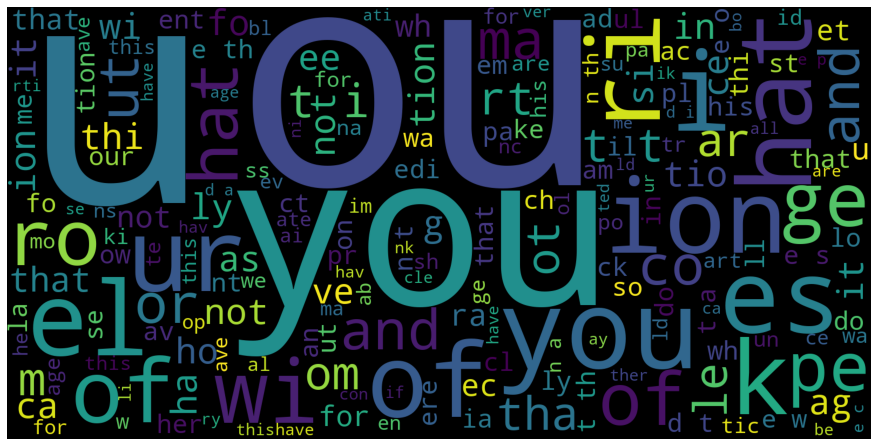

In [56]:
#Representing the word tags that have maximum frequency
tag_to_count_map1
tup2 = dict(tag_to_count_map1.items())
word_cloud = WordCloud(width=1600,height=800,).generate_from_frequencies(tup2)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

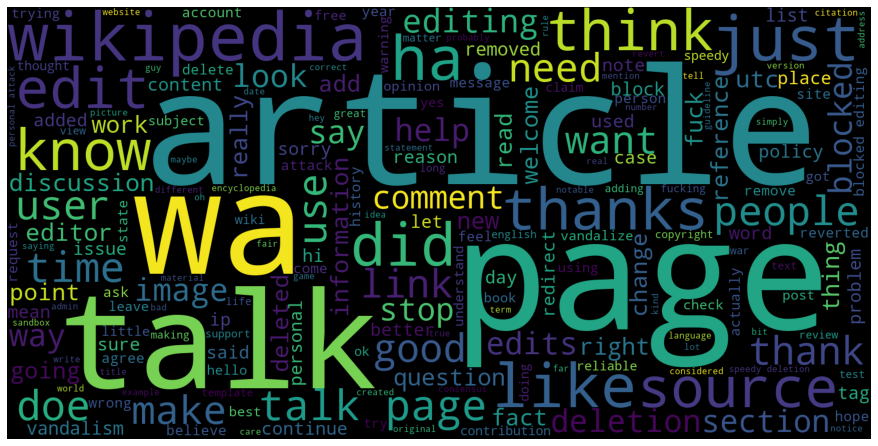

In [57]:
#Representing the character tags that have maximum frequency
tag_to_count_map
tupl = dict(tag_to_count_map.items())
word_cloud = WordCloud(width=1600,height=800,).generate_from_frequencies(tupl)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [58]:
#Using hstack to combine the total features which includes the characters and the words
from scipy.sparse import hstack
# from scipy.sparse import vstack
freq=hstack([train_char_features, train_word_features]) # Horizontally merging the training and test features. 
test_freq=hstack([test_char_features, test_word_features])
# v_freq=vstack([train_char_features, train_word_features])
# v_test_freq=vstack([test_char_features, test_word_features])

In [59]:
#Removing the repeating words
# def remove_repeat(text, repeat=1):
#     text = text.split(' ')
#     result = []
#     for word in text:
#         if result.count(word)<repeat:
#             result.append(word)
#     return ' '.join(result)
# test['preprocess_text'] = test['preprocess_text'].apply(remove_stopwords)

In [60]:
Y_train = train_df.iloc[:, 1:7]

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [62]:
# Split Data 

# Xtrain,Xtest,Ytrain,Ytest = train_test_split(freq,Y_train,test_size=0.3,random_state=42)

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
gnb = GaussianNB()

In [64]:
#Finding the f1_score with Gaussian Naive Bayes
# for i in classes:
#     Ytrain=Ytrain[i]
#     y_pred = gnb.fit(Xtrain, Ytrain.values.ravel()).predict(Xtest)
#     sco=f1_score(Ytest,y_pred)
#     score.append(sco)

In [65]:
!pip install scikit-multilearn

IMPLEMENTING THE MODELS

In [66]:
# #Implementing the Logistic Regression model on the test dataset
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# sub_df=pd.DataFrame()
# sub_df.insert(0,"id",test_df["id"].tolist())

# from sklearn.multiclass import OneVsRestClassifier
# from skmultilearn.problem_transform import ClassifierChain
# # from sklearn import linear_model
# #from sklearn.multiclass import ClassifierChain
# lr = LogisticRegression(solver = 'liblinear', n_jobs = -1)

# # LogRegression = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
# #LogRegression = Pipeline([('clf', ClassifierChain(LogisticRegression(solver='sag')))])

# classes = ['harsh','extremely_harsh','vulgar', 'threatening', 'disrespect', 'targeted_hate']

# for i in classes:
#    lr.fit(freq, Y_train[i])
#    pred_y=LogRegression.predict_proba(test_freq)[:,1]
#    sub_df.insert(len(sub_df.columns),i,pred_y)
#   #base_lr = LogisticRegression()
#   #chain = ClassifierChain(base_lr)
#   #pred_y = chain.fit(freq, Y_train).predict_proba(test_freq)[:,1]
#   #sub_df.insert(len(sub_df.columns),i,pred_y)
# sub_df.to_csv("trying.csv",index=None)

In [67]:
# Xtrain,Xtest,Ytrain,Ytest = train_test_split(freq,Y_train,test_size=0.3,random_state=69)

In [68]:
# from sklearn.naive_bayes import MultinomialNB
# from skmultilearn.problem_transform import LabelPowerset
# clf = LabelPowerset(MultinomialNB())
# clf.fit(freq,Y_train)
# label= clf.predict(test_freq)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
sub_df=pd.DataFrame()
sub_df.insert(0,"id",test_df["id"].tolist())
# from sklearn.multiclass import OneVsRestClassifier

# LogRegression = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
gnb = GaussianNB()
freq1= freq.toarray()
classes = ['harsh','extremely_harsh','vulgar', 'threatening', 'disrespect', 'targeted_hate']
for i in classes:
    gnb.fit(freq1, Y_train[i])
    pred_y=gnb.predict_proba(test_freq)[:,1]
    sub_df.insert(len(sub_df.columns),i,pred_y)
sub_df.to_csv("NB.csv",index=None)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
sub_df=pd.DataFrame()
sub_df.insert(0,"id",test_df["id"].tolist())
# from sklearn.multiclass import OneVsRestClassifier

# LogRegression = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
lr = LogisticRegression(solver = 'liblinear')
classes = ['harsh','extremely_harsh','vulgar', 'threatening', 'disrespect', 'targeted_hate']
for i in classes:
    lr.fit(freq, Y_train[i])
    pred_y=lr.predict_proba(test_freq)[:,1]
    sub_df.insert(len(sub_df.columns),i,pred_y)
sub_df.to_csv("fresh.csv",index=None)

In [ ]:
# #Implementing Random forest on test dataset
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline

# # from sklearn.multiclass import OneVsRestClassifier

# su_df=pd.DataFrame()
# su_df.insert(0,"id",test_df["id"].tolist())
# rfc = RandomForestClassifier(max_features =3000, max_depth = 100, min_samples_split = 10, criterion = 'gini', n_estimators = 120, min_weight_fraction_leaf = 0.0, max_leaf_nodes = None)
# classes = ['harsh','extremely_harsh','vulgar', 'threatening', 'disrespect', 'targeted_hate']

# for i in classes:
#     rfc.fit(freq, Y_train[i])
# #     prediction_train = LogRegression.predict(Xtest)
# #     prediction_test = LogRegression.predict(test_freq)
#     pred_y=rfc.predict_proba(test_freq)[:,1]
#     su_df.insert(len(su_df.columns),i,pred_y)
# su_df.to_csv("Day2.csv",index=None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pickle

In [ ]:
temp = freq.tocsr()
def pr(y_i, y): 
    p = temp[y==y_i].sum(0)
    return (p + 1) / ((y == y_i).sum() + 1)

In [ ]:
ratio_values=[]
model_storage = open('model_storage.pckl', 'wb')
for label in classes:
  train_target = train_df[label]
  train_target_values = train_target.values
  r = np.log(pr(1, train_target_values) / pr(0, train_target_values))
  x_nb = freq.multiply(r)
  r_fc = RandomForestClassifier(max_features =200)
  log_r = LogisticRegression(solver = 'liblinear')
  vote = VotingClassifier(voting = 'soft', estimators = [('lr', log_r), ('rfc', r_fc)], weights = [1, 0.7])
  vote.fit(x_nb, train_target_values)
  ratio_values.append(r)  
  pickle.dump(vote, model_storage)
# model_storage.to_csv("pickle.csv",index=None)


In [ ]:
model_storage.close()

In [ ]:
Output = pd.DataFrame.from_dict({'id': test_df['id']})
models = []

with open("model_storage.pckl", "rb") as file:
    while True:
        try:
            models.append(pickle.load(file)) # Collect the models that have been saved in the pickle file and make the probability predictions accordingly.
        except EOFError:
            break

# We need to use .predict_proba(test data) for all other models except Ridge Classifier.
# The ridge classifier works with simple .predict(test data) function.
i=0  
for category in classes:
    train_target = train_df[category]
    #Output[category] = models[i].predict(test_features)
    Output[category] = models[i].predict_proba(test_freq.multiply(ratio_values[i]))[:, 1] # Predictions made by the trained models on the test data.
    i=i+1

Output.to_csv('FinalSubmission.csv', index = False) # Final kaggle submission .csv file.

In [ ]:
# #Random forests but with lesser number of decision trees
# forest = RandomForestClassifier(n_estimators=100).fit(freq,Y_train)

In [ ]:
# #We predict using random forest the test data with the labels
# y_pred_rf2 = forest.predict(test_freq)

In [ ]:
# y_ghjjkhgfdcccc

In [ ]:
#Now we merge this labels with test dataframe
# combine=pd.merge(test_df,test_labels)

In [ ]:
# combine.shape
# combine.describe

In [ ]:
#We map the labels and the id's of the sentences to form a dataframe 'submit'
# submit = pd.DataFrame({'id':combine.id, 'harsh':y_pred_rf2[:,0],'extremely_harsh':y_pred_rf2[:,1],'vulgar':y_pred_rf2[:,2],'threatening':y_pred_rf2[:,3],'disrespect':y_pred_rf2[:,4],'targeted_hate':y_pred_rf2[:,5]})

In [ ]:
# test_na = test_labels[
#     (test_labels.harsh == 0) | (test_labels.extremely_harsh == 0) |
#     (test_labels.vulgar == 0) | (test_labels.threatening == 0) |
#     (test_labels.disrespect == 0) | (test_labels.targeted_hate == 0)
# ]

In [ ]:
# submit.shape

In [ ]:
# test_df.shape

In [ ]:
# test_labels.shape

In [ ]:
# # submit=pd.concat([submit,test_na],ignore_index=True)
# # Export
# submit.to_csv('submission.csv',index=False)

In [ ]:
# #Now we try another method which is multiOutputClassifier
# #This classifier uses logistic regression method
# from sklearn.multioutput import MultiOutputClassifier
# lr = MultiOutputClassifier(estimator=LogisticRegression()).fit(freq,Y_train)

In [ ]:
# #Same thing done as above
# y_pred_lr = lr.predict(test_freq)

In [ ]:
# #This dataframe that is formed by id's and sentences that are predicted is named as submit1
# submit1 = pd.DataFrame({'id':combine.id, 'harsh':label[:,0],'extremely_harsh':label[:,1],'vulgar':label[:,2],'threatening':label[:,3],'disrespect':label[:,4],'targeted_hate':label[:,5]})

In [ ]:
# submit1.shape

In [ ]:
# # submit1=pd.concat([submit,test_na],ignore_index=True)
# # # Export
# submit1.to_csv('subm1.csv',index=False)

HMM

In [ ]:
#Calculate the roc_auc score on different Logistic regression
# from sklearn.metrics import roc_auc_score
# LogRegression_roc = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear'), n_jobs=-1)),])
# classes = ['harsh','extremely_harsh','vulgar', 'threatening', 'disrespect', 'targeted_hate']
# for i in classes:
#     LogRegression_roc.fit(Xtrain, Ytrain[i])
#     prediction = LogRegression_roc.predict(Xtest)
#     print('roc_auc_score is {}'.format(roc_auc_score(Ytest[i], prediction)))
#     print("\n")

In [ ]:
#Implementing the logistic regression but with under-sampling and over-sampling
# from sklearn.linear_model import LogisticRegression
# # from sklearn.linear_model import LogisticRegressionCV
# from sklearn.pipeline import Pipeline
# sub_df=pd.DataFrame()
# sub_df.insert(0,"id",test_df["id"].tolist())
# from sklearn.multiclass import OneVsRestClassifier

# classes = ['harsh','extremely_harsh','vulgar', 'threatening', 'disrespect', 'targeted_hate']
# # from imblearn.under_sampling import NearMiss  # Under Sampling
# # nm = NearMiss()

# # from imblearn.over_sampling import SMOTE  # Over Sampling
# # smk = SMOTE()

# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(solver = 'liblinear', n_jobs = -1) 

# for i in classes:
#     Y_train = train_df[i].to_numpy().astype(np.float64)
#     X_train_balanced, Y_train_balanced = smk.fit_resample(freq, Y_train)
#     lr.fit(X_train_balanced, Y_train_balanced)
#     pred_y=lr.predict_proba(test_freq)[:,1]
#     sub_df.insert(len(sub_df.columns),i,pred_y)
# sub_df.to_csv("with_smo.csv",index=None)   

In [ ]:
#njobs = -1 in this logistic regression implementation
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# sub_df=pd.DataFrame()
# sub_df.insert(0,"id",test_df["id"].tolist())
# # from sklearn.multiclass import OneVsRestClassifier

# # LogRegression = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
# lr = LogisticRegression(max_iter = 499, dual = False, C = 2)
# classes = ['harsh','extremely_harsh','vulgar', 'threatening', 'disrespect', 'targeted_hate']
# for i in classes:
#     lr.fit(freq, Y_train[i])
#     pred_y=lr.predict_proba(test_freq)[:,1]
#     sub_df.insert(len(sub_df.columns),i,pred_y)
# sub_df.to_csv("new_submission.csv",index=None)

In [ ]:
# file=new_submission.to_csv('./new_submission')

In [ ]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB
# from sklearn.metrics import f1_score
# from skmultilearn.problem_transform import LabelPowerset
# from sklearn import linear_model
# from skmultilearn.problem_transform import ClassifierChain

In [ ]:
# label= build_model(,,freq,Y_train,test_freq)

# clf_labelPowerset_model_gaussNB = build_model(GaussianNB(),LabelPowerset,Xtrain,Ytrain,Xtest,Ytest)
# clf_labelPowerset_model_lr = build_model(linear_model.LogisticRegression(),LabelPowerset,Xtrain,Ytrain,Xtest,Ytest)
# clf_classifier_chain_model_multiNB = build_model(MultinomialNB(),ClassifierChain,Xtrain,Ytrain,Xtest,Ytest)
# clf_classifier_chain_model_lr = build_model(linear_model.LogisticRegression(),ClassifierChain,Xtrain,Ytrain,Xtest,Ytest)

In [ ]:
# print(clf_labelPowerset_model_multiNB)
# print(clf_labelPowerset_model_gaussNB)
# print(clf_labelPowerset_model_lr)
# print(clf_classifier_chain_model_multiNB)
# print(clf_classifier_chain_model_lr)